# 预备知识

## 数据操作

In [23]:
x = torch.arange(12)
y = torch.arange(12) # 采用基于CPU的计算 创建一个行向量x
y[1] = 5
y[6] = 11
print(x)
print(y)
print(x.size())

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([ 0,  5,  2,  3,  4,  5, 11,  7,  8,  9, 10, 11])
torch.Size([12])


In [24]:
# tensor中的元素总数
x.numel()

12

In [25]:
print(x.reshape(2,6))
print(x.reshape(3,-1))

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


我们不需要通过手动指定每个维度来改变形状。 也就是说，如果我们的目标形状是（高度,宽度）， 那么在知道宽度后，高度会被自动计算得出，不必我们自己做除法。 在上面的例子中，为了获得一个3行的矩阵，我们手动指定了它有3行和4列。 幸运的是，我们可以通过-1来调用此自动计算出维度的功能。 即我们可以用x.reshape(-1,4)或x.reshape(3,-1)来取代x.reshape(3,4)。

同样，我们可以创建一个形状为(2,3,4)的张量，其中所有元素都设置为1。代码如下：

In [26]:
print(torch.ones((2, 3, 4)))
torch.randn(3, 4)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


tensor([[-0.5814,  0.3345, -0.3565,  0.6558],
        [ 1.6499,  0.5269, -0.2869,  1.7883],
        [-1.5049, -0.8539,  0.1361,  0.7198]])

有时我们想通过从某个特定的概率分布中随机采样来得到张量中每个元素的值。 例如，当我们构造数组来作为神经网络中的参数时，我们通常会随机初始化参数的值。 以下代码创建一个形状为（3,4）的张量。 其中的每个元素都从均值为0、标准差为1的标准高斯分布（正态分布）中随机采样。

我们还可以通过提供包含数值的Python列表（或嵌套列表），来为所需张量中的每个元素赋予确定值。 在这里，最外层的列表对应于轴0，内层的列表对应于轴1。

In [27]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

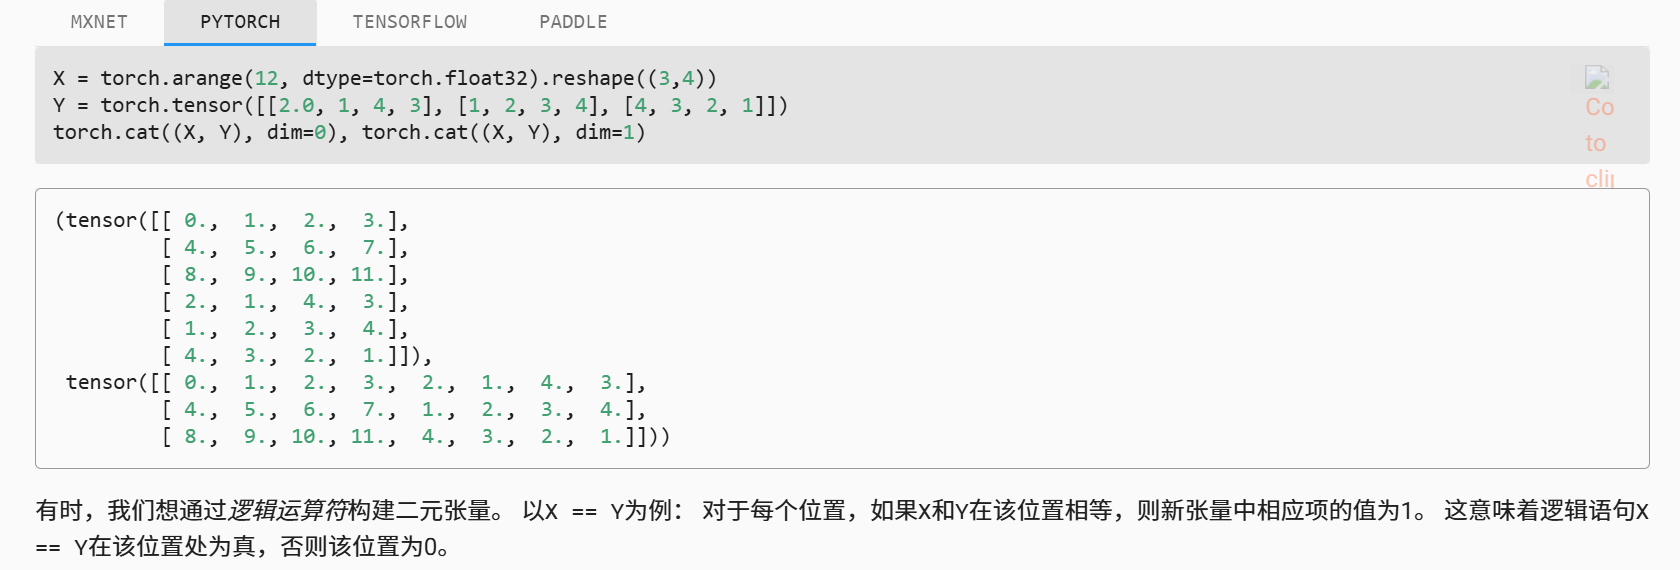

In [28]:
x==y

tensor([ True, False,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True])

In [29]:
x.sum()

tensor(66)

In [ ]:
# 广播机制

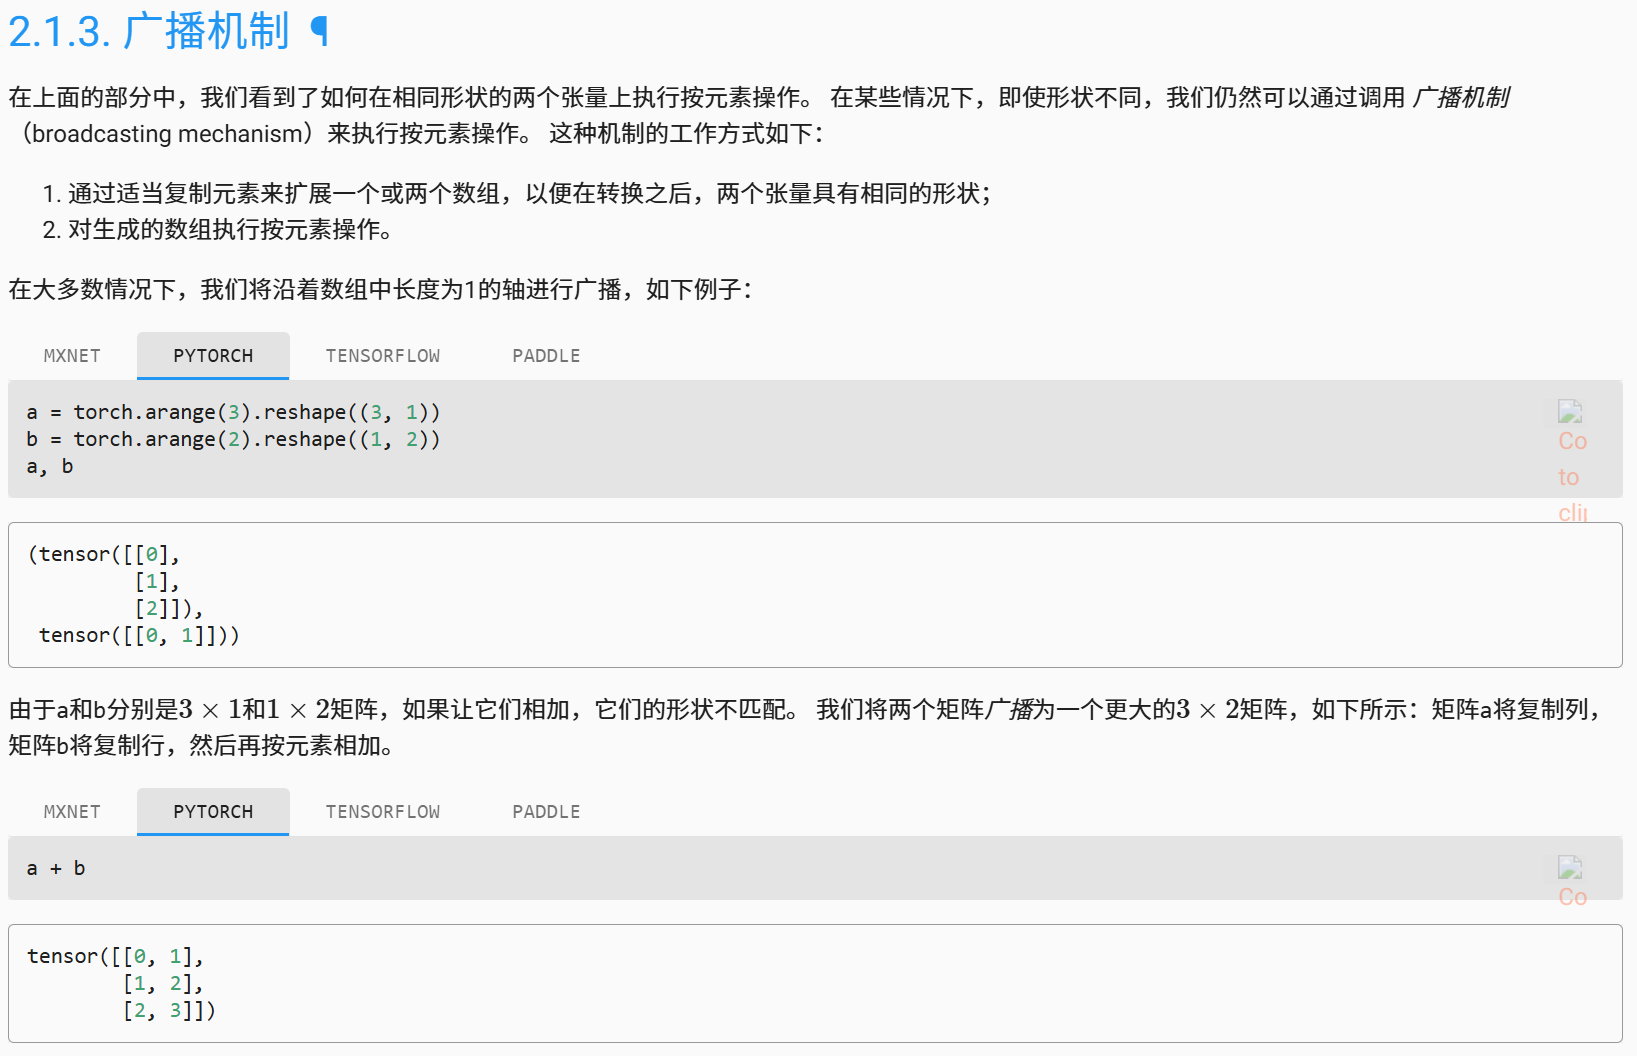

In [33]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
#torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)
print(X)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])


就像在任何其他Python数组中一样，张量中的元素可以通过索引访问。 与任何Python数组一样：第一个元素的索引是0，最后一个元素索引是-1； 可以指定范围以包含第一个元素和最后一个之前的元素。

如下所示，我们可以用[-1]选择最后一个元素，可以用[1:3]选择第二个和第三个元素：

In [39]:
X[-1],X[0:3] #左开右闭

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

## 关于节省内存

下面证明了*Y=Y+X* 中，结果是一块新分配的内存块,并且使用了广播机制。

In [6]:
import torch
Y = torch.ones(2,3)
print(Y)
X = torch.arange(2).reshape(2,1)  
print(X)
before = id(Y)
Y = Y + X
print(Y)
print(id(Y)==before)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0],
        [1]])
tensor([[1., 1., 1.],
        [2., 2., 2.]])
False


因为我们可能有数百兆的参数，并且在一秒内多次更新所有参数。我们不希望新的引用会指向其他位置（也可能是已经经过分配的位置，已经存在数据）。我们希望原地更新，保证内存可以最大化其使用效能。可以通过**切片？**来完成。

In [10]:
Z = torch.ones_like(Y) #Y的形状 ，对Z进行事先分配
Z1 = torch.ones_like(Y)
print('id(Z):',id(Z))
print('id(Z):',id(Z1))
Z1=X+Y
print('id(Z):',id(Z))
Z[:] = X+Y
print('id(Z):',id(Z))


id(Z): 1722733477376
id(Z): 1722733477456
id(Z): 1722733477376
id(Z): 1722733477376


达成上述操作的步骤有两个：一个是提前声明，另外是用索引。需要声明的是，X +=Y 与 X=X+Y是**不一样**的,X +=Y 与X[:]进行加法的操作等价。

## numpy与torch 对象的互换

他俩共享底层内存。操作方法是：

In [11]:
A=X.numpy()
B = torch.tensor(A)
type(A),type(B)

(numpy.ndarray, torch.Tensor)

要将大小为1的张量转换为Python标量，我们可以调用item函数或Python的内置函数。

In [12]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## 课后题

1.运行本节中的代码。将本节中的条件语句X == Y更改为X < Y或X > Y，然后看看你可以得到什么样的张量。

2.用其他形状（例如三维张量）替换广播机制中按元素操作的两个张量。结果是否与预期相同？

In [17]:
x = torch.tensor([[1,8,6],[6,-7,1],[2,3,1]])
y = torch.arange(9).reshape(3,3) # 采用基于CPU的计算 创建一个行向量x
print(x>y)

tensor([[ True,  True,  True],
        [ True, False, False],
        [False, False, False]])


In [22]:
x = torch.ones(2,3,1)
print(x)
y = torch.ones(3,1)
print(y)
print(x+y)

tensor([[[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]]])
tensor([[1.],
        [1.],
        [1.]])
tensor([[[2.],
         [2.],
         [2.]],

        [[2.],
         [2.],
         [2.]]])


# 数据预处理

## 读取数据集

使用python创建一个csv。创建一个人工数据集，并存储在CSV（逗号分隔值）文件 ../data/house_tiny.csv中。 以其他格式存储的数据也可以通过类似的方式进行处理。下面我们将数据集按行写入CSV文件中。

In [4]:
import os
data = 'data_folder'
os.makedirs(os.path.join('E:\\pytorch',data),exist_ok = True)
data_file = os.path.join('E:\\pytorch',data,'house_tiny.csv')
with open(data_file,'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')
    f.write('NA,Pave,134000\n')
    f.write('3,NA,134000\n')

·os.makedirs()函数用于递归创建目录。这意味着，如果父目录不存在，os.makedirs()也会创建它们。例如，如果'..'（代表当前目录的上一级目录）中不存在'data'目录，这个函数就会创建它。

·os.path.join('..', 'data')是os.path模块的一个函数，用于将多个路径组件合并成一个路径。在这个例子中，它合并了'..'（当前目录的上一级目录）和'data'，生成了相对路径'../data'。

·exist_ok=True是一个关键字参数，它告诉os.makedirs()如果目标目录已经存在，不要抛出FileExistsError异常，而是忽略它。这是Python 3.2及以后版本中添加的功能，用于简化目录创建的代码，无需先检查目录是否存在。

## 处理缺失值

典型的方法包括插值法和删除法， 其中插值法用一个替代值弥补缺失值，而删除法则直接忽略缺失值。 在这里，我们将考虑插值法。

In [ ]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean()) #这样对于数据项较好解决，对于类别项无用
print(inputs)

对于inputs中的类别值或离散值，我们将“NaN”视为一个类别。 由于“巷子类型”（“Alley”）列只接受两种类型的类别值“Pave”和“NaN”， pandas可以自动将此列转换为两列“Alley_Pave”和“Alley_nan”。 巷子类型为“Pave”的行会将“Alley_Pave”的值设置为1，“Alley_nan”的值设置为0。 缺少巷子类型的行会将“Alley_Pave”和“Alley_nan”分别设置为0和1。

In [1]:
import pandas as pd
inputs = pd.get_dummies(inputs,dummy_na=True)
print(inputs)

NameError: name 'inputs' is not defined

In [ ]:
pd.get_dummies 是 Pandas 库中的一个函数，用于将分类变量转换为虚拟变量（或称为哑变量），这是进行机器学习和统计建模时常见的预处理步骤之一。
以下是这个函数如何工作的解释：

#### 函数解释

pd.get_dummies 函数：
这个函数用于将分类变量转换为虚拟变量。虚拟变量通常是二进制（0 或 1）变量，用于指示某个分类的存在或不存在。

inputs 参数：
这是你要转换的 DataFrame 或 Series。pd.get_dummies 函数将对 inputs 中的每个分类变量（通常是具有非数值的列）进行转换。

dummy_na=True 参数：
当 dummy_na=True 时，pd.get_dummies 会为缺失值（NaN）创建一个额外的指示变量。这在某些情况下非常有用，因为缺失值本身也可能包含信息。

#### 代码示例

假设 inputs 数据框如下：

import pandas as pd

data = {
    'color': ['red', 'blue', 'green', 'red', None],
    'size': ['S', 'M', 'L', 'S', 'XL']
}
inputs = pd.DataFrame(data)
调用 pd.get_dummies(inputs, dummy_na=True) 后，inputs 可能会变成如下所示的数据框：

inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)
结果：

color_blue	color_green	color_red	color_nan	size_L	size_M	size_S	size_XL
0	0	1	0	0	0	1	0
1	0	0	0	0	1	0	0
0	1	0	0	1	0	0	0
0	0	1	0	0	0	1	0
0	0	0	1	0	0	0	1

## 练习

创建包含更多行和列的原始数据集。 

删除缺失值最多的列。

将预处理后的数据集转换为张量格式